In [59]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget
import scipy.optimize as spo
import math

In [4]:
!pip install wget


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9686 sha256=473f1bd82d42ca0ba2986ada6a0166977e1ee2fcf6e5a97790f18ef68341d0ba
  Stored in directory: c:\users\juan s saavedra\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [52]:

file = 'Sigmoid.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file
    

--File found---


In [53]:
Data = np.loadtxt(Path_,delimiter="," , skiprows=1)

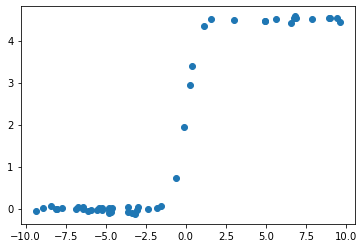

In [54]:
x = Data[:,0]
y = Data[:,1]
plt.scatter(x,y)

In [90]:
def Sigmoide(x,p):
    A,B,C = p 
    return A/(B+np.exp(-C*x))


In [91]:
def chi2(p,x,y,Model): 
    
    return np.sum((y-Model(x,p))**2)


In [92]:
Metric = lambda *theta : Chi2(*theta)

In [93]:
theta0 = np.array([1,1,1])
chi2(theta0,x,y,Sigmoide)

202.86313726782592

In [94]:
result = spo.minimize(chi2 , theta0 , args = (x,y,Sigmoide), options={"disp":True}, method="Nelder-Mead" )

Optimization terminated successfully.
         Current function value: 0.105012
         Iterations: 109
         Function evaluations: 202


In [95]:
print(result)

 final_simplex: (array([[4.40086606, 0.97515686, 2.78201155],
       [4.40079454, 0.9751397 , 2.78207144],
       [4.40087258, 0.97515609, 2.78201596],
       [4.40090902, 0.97516572, 2.78206878]]), array([0.10501218, 0.10501218, 0.10501218, 0.10501219]))
           fun: 0.10501218414100094
       message: 'Optimization terminated successfully.'
          nfev: 202
           nit: 109
        status: 0
       success: True
             x: array([4.40086606, 0.97515686, 2.78201155])


In [96]:
valores = result.x

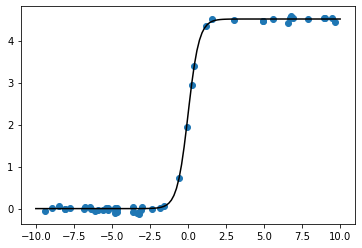

In [97]:
X=np.linspace(-10,10,1000)
plt.scatter(x,y)
plt.plot(X,Sigmoide(X,valores),color="k")
plt.show()